# Combined cycle energy prediction using KNeighborsRegressor

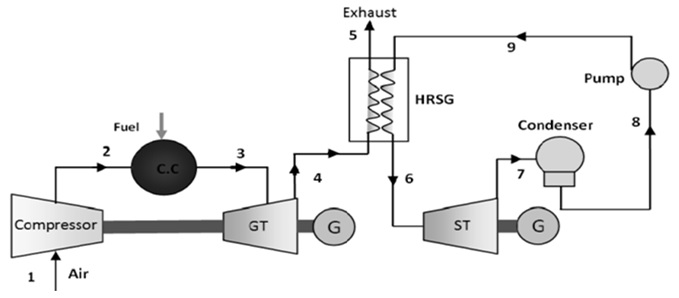

In [1]:
from IPython.display import Image
Image(filename='Combined_Cycle.jpg')

The combined cycle is a power generation process that combines two power generation technologies: usually a gas turbine and a steam turbine. In the first step, natural gas or another fuel is burned in the gas turbine, generating mechanical energy that is used to turn a generator and produce electricity. The hot exhaust gases from the gas turbine are then directed to a heat exchanger, where they are used to generate steam. This steam is then used to drive a second turbine, the steam turbine, generating even more mechanical energy that is converted back into electricity.

The importance of the combined cycle in industry is related to its energy efficiency. By combining two power generation technologies into a single system, the combined cycle can better utilize waste heat from the first stage (the gas turbine) to generate more electricity in the second stage (the steam turbine). This results in higher overall efficiency than conventional power generation technologies that use only a single power conversion step.

# Introduction 

This notebook's objective is to achieve the best machine learning model for predicting the power output of a combined cycle power plant using KNeighborsRegressor.

The dataset was used is based on another dataset found in Kaggle (https://www.kaggle.com/datasets/marouandaghmoumi/combined-cycle-power-plant).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

In [3]:
df_CC = pd.read_csv('data.csv', sep = ';')

# Data Information and Preview

In [4]:
df_CC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47840 entries, 0 to 47839
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      47840 non-null  float64
 1   V       47840 non-null  float64
 2   AP      47840 non-null  float64
 3   RH      47840 non-null  float64
 4   PE      47840 non-null  float64
dtypes: float64(5)
memory usage: 1.8 MB


$\textbf{AT:}$ Temperature [Cº].\
$\textbf{V:}$ Exhaust Vacuum [cmHg].\
$\textbf{AP:}$ Ambient Pressure [mbar].\
$\textbf{RH:}$ Relative Humidity [%].\
$\textbf{PE:}$ Net hourly electrical energy Target [MW].

In [5]:
df_CC.head(10)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
5,26.27,59.44,1012.23,58.77,443.67
6,15.89,43.96,1014.02,75.24,467.35
7,9.48,44.71,1019.12,66.43,478.42
8,14.64,45.00,1021.78,41.25,475.98
9,11.74,43.56,1015.14,70.72,477.50


# Exploratory Data Analysis (EDA)

In [6]:
df_CC.describe()

,AT,V,AP,RH,PE
count,47840.000000,47840.000000,47840.000000,47840.000000,47840.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452162,12.707362,5.938535,14.599658,17.066281
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


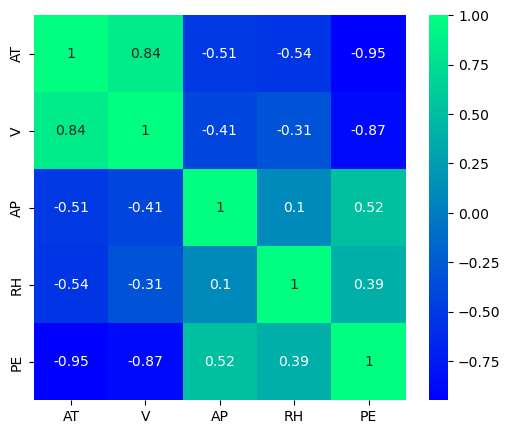

In [7]:
correlation_matrix = df_CC.corr()

plt.figure(figsize = (6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='winter')
plt.show()

$\textbf{AT}$ and $\textbf{V}$ have a strong correlation with $\textbf{PE}$, in contrast, $\textbf{AP}$ and $\textbf{RH}$ have a reasonable correlation.

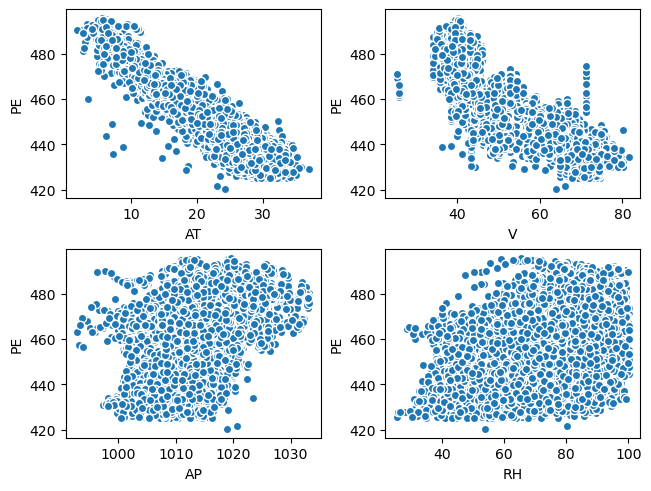

In [8]:
fig, ax = plt.subplots(ncols = 2, nrows = 2, constrained_layout=True)
ax[0,0].scatter(df_CC.AT, df_CC.PE, edgecolor='white')
ax[0,0].set_xlabel('AT')
ax[0,0].set_ylabel('PE')

ax[0,1].scatter(df_CC.V, df_CC.PE, edgecolor='white')
ax[0,1].set_xlabel('V')
ax[0,1].set_ylabel('PE')

ax[1,0].scatter(df_CC.AP, df_CC.PE, edgecolor='white')
ax[1,0].set_xlabel('AP')
ax[1,0].set_ylabel('PE')

ax[1,1].scatter(df_CC.RH, df_CC.PE, edgecolor='white')
ax[1,1].set_xlabel('RH')
ax[1,1].set_ylabel('PE')

plt.show()

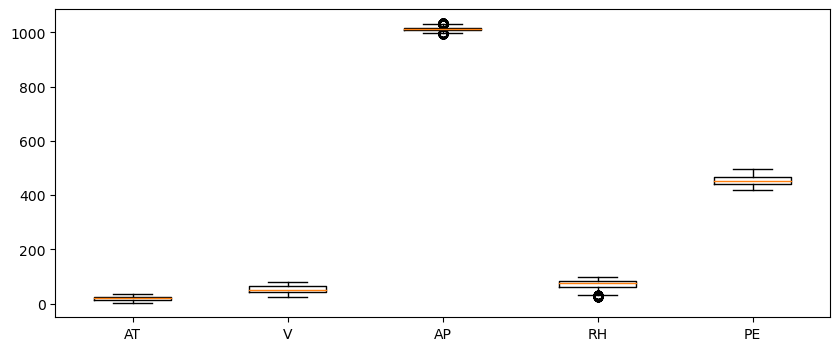

In [9]:
fig, ax = plt.subplots(figsize = (10, 4))

ax.boxplot(df_CC.iloc[:, :5])
ax.set_xticks(range(1, df_CC.iloc[:, :5].shape[1]+1), df_CC.iloc[:, :5].columns, fontsize=10)

plt.show()

The independent variable aren't on the same scale. Models like KNeighborsRegressor are less eficient when trained with data on different scale.

# Training and testing the model before data processing

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [11]:
from sklearn.neighbors import KNeighborsRegressor

In [12]:
X,y = df_CC.drop(['PE'], axis=1), df_CC.PE
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state =42)

In [13]:
model_neigh = KNeighborsRegressor()
model_neigh.fit(X_train, y_train)
y_pred = model_neigh.predict(X_test)

print('Mean Squared Error:',mean_squared_error(y_test, y_pred))
print('R2-score:',r2_score(y_test, y_pred))

Mean Squared Error: 4.423945683389079
R2-score: 0.9848650006085105


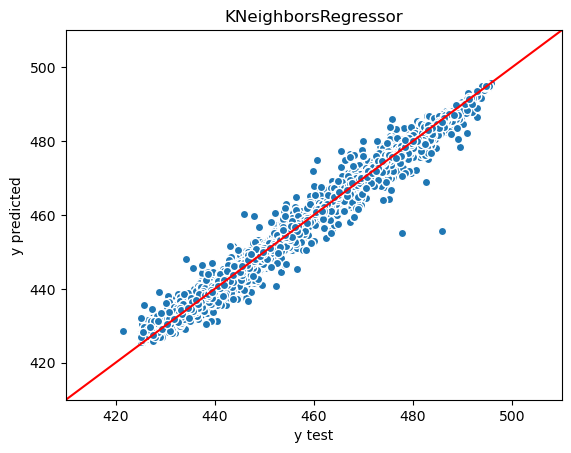

In [14]:
plt.scatter(y_test, y_pred, edgecolor='white')
plt.plot([410, 510], [410, 510], color ='red')
plt.xlim([410, 510])
plt.ylim([410, 510])
plt.xlabel('y test')
plt.ylabel('y predicted')
plt.title('KNeighborsRegressor')
plt.show()

# Data Processing

As already mentioned, the data not being on the same scale ends up harming KNeighbor Regressor, which is why the data must be standardized now.

In [15]:
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(df_CC[['AT', 'V', 'AP', 'RH']])
df_CC[['AT', 'V', 'AP', 'RH']] = transformer.transform(df_CC[['AT', 'V', 'AP', 'RH']])

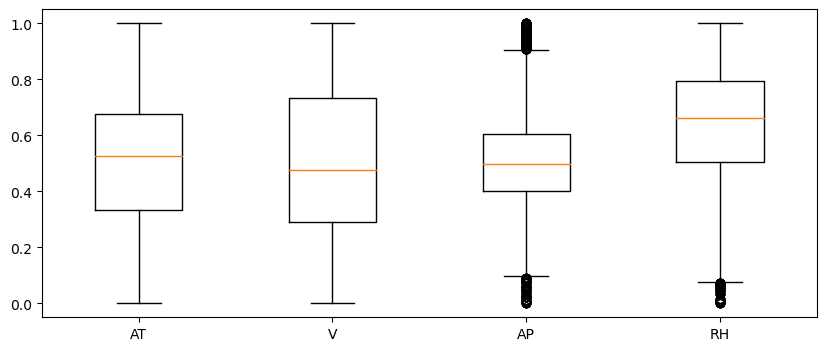

In [16]:
fig, ax = plt.subplots(figsize = (10, 4))

ax.boxplot(df_CC.iloc[:, :4])
ax.set_xticks(range(1, df_CC.iloc[:, :4].shape[1]+1), df_CC.iloc[:, :4].columns, fontsize=10)

plt.show()

In [17]:
X,y = df_CC.drop(['PE'], axis=1), df_CC.PE
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state =42)

In [18]:
model_neigh = KNeighborsRegressor()
model_neigh.fit(X_train, y_train)
y_pred = model_neigh.predict(X_test)

print('Mean Squared Error:',mean_squared_error(y_test, y_pred))
print('R2-score:',r2_score(y_test, y_pred))

Mean Squared Error: 4.050687525362326
R2-score: 0.9861419742422092


Can be observed, a decrease in the mean squared error.

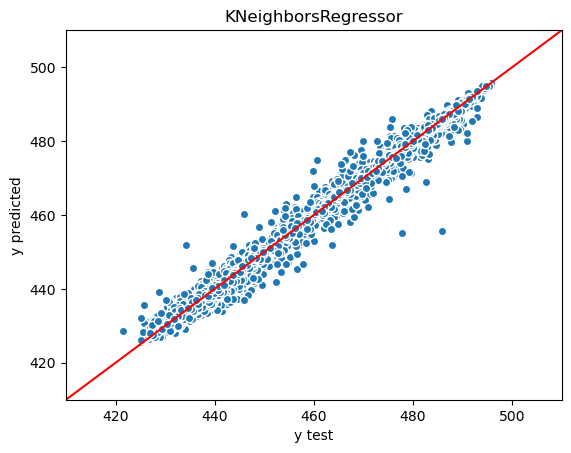

In [19]:
plt.scatter(y_test, y_pred, edgecolor='white')
plt.plot([410, 510], [410, 510], color ='red')
plt.xlim([410, 510])
plt.ylim([410, 510])
plt.xlabel('y test')
plt.ylabel('y predicted')
plt.title('KNeighborsRegressor')
plt.show()

# Model Tuning

Is essential to find the best combination of KNeighborsRegressor parameters to build the model with the lowest mean squared error. Therefore, I'm tuning my model.

In [20]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [21]:
parameters_knr = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'weights': ['distance'],
    'p': np.linspace(1, 2, num = 11)
}

In [22]:
kfold_knr = KFold(shuffle=True, random_state=42, n_splits= 8)
grid_search_knr = GridSearchCV(model_neigh, parameters_knr, scoring = 'neg_mean_squared_error', cv = kfold_knr, error_score='raise')
grid_search_knr = grid_search_knr.fit(X_train, y_train)
best_model_knr = grid_search_knr.best_estimator_
y_pred = best_model_knr.predict(X_test)

print('Mean Squared Error:',mean_squared_error(y_test, y_pred))
print('R2-score:',r2_score(y_test, y_pred))

Mean Squared Error: 0.054563740531779634
R2-score: 0.9998133290417993


Finally I arrived at a model with a mean squared error of 0.055, a great result.

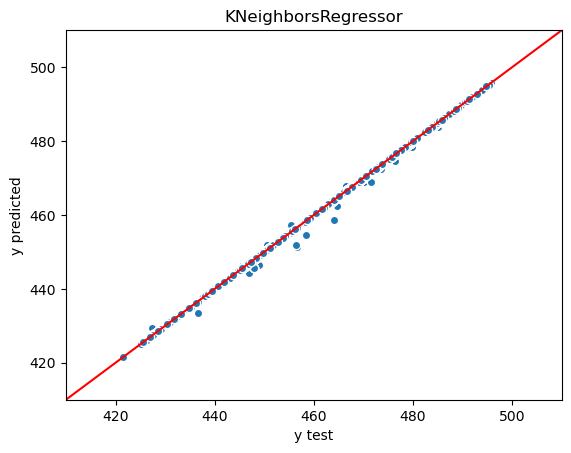

In [23]:
plt.scatter(y_test, y_pred, edgecolor='white')
plt.plot([410, 510], [410, 510], color ='red')
plt.xlim([410, 510])
plt.ylim([410, 510])
plt.xlabel('y test')
plt.ylabel('y predicted')
plt.title('KNeighborsRegressor')
plt.show()

Here is the model and its parameters.

In [24]:
best_model_knr

KNeighborsRegressor(n_neighbors=7, p=1.1, weights='distance')